# Hands-On Assignment 5

In this assignment, you will practice everything that you have learned so far in an end-to-end setting.
You will be provided with a dataset that is **unique to you**, and your task is to perform
all the steps from previous assignments to clean, explore, visualize, and analyze your dataset.

**Written Portion**: Additionally, you will create a report that describes your process and provides insights about your dataset.
Each section that should appear in your report is noted with an orange star (like normal HO tasks).  The report should be  4-6 pages (12 pt font, 1.5 line spacing), and turned in on Canvas as a PDF.

The coding aspect for this assignment will be turned in the same was as all other HO's,
by submitting this file to the autograder.


For this assignment, feel free to make additional functions instead of implementing everything in the provided function.

The objective of this assignment is for you to apply and solidify the skills you have learned in previous assignments.

# Prompt

You have graduated from this class, and are a huge success!
You landed a job doing data science at some fancy company.

You just got a new client with some really interesting problems you get to solve.
Unfortunately, because of a big mess-up on their side the data's metadata got corrupted up
(and the person that used to maintain the data just took a vow of silence and moved to a bog).

The only column you are sure about is the `label` column,
which contains a numeric label for each row.
Aside from that, the client does not know anything about the names, content, or even data types for each column.

Your task is to explore, clean, and analyze this data.
You should have already received an email with the details on obtaining your unique data.
Place it in the same directory as this notebook (and your `grade_local.py` script) and name it `data.txt`.

*I know this prompt may sound unrealistic, but I have literally been in a situation exactly like this.
I was working at a database startup, and one of our clients gave us data with over 70 columns and more than a million records and told us:
"The person who used to manage the data is no longer working with us, but this was the data they used to make all their decisions.
We also lost all the metadata information, like column names."
...
Working in industry is not always glamorous.
-Eriq*

# Part 0: Explore Your Data

Before you start doing things to/with your data, it's always a good idea to load up your data and take a look.

In [19]:
import pandas

import re

import numpy

import warnings

import pandas.errors as errors

import sklearn

import sklearn.preprocessing

import sklearn.tree

from scipy.stats import ttest_ind

from sklearn.model_selection import cross_validate

# Modify this to point to your data.
unique_data = pandas.read_csv('data.txt', sep = "\t")
unique_data

,label,col_00,col_01,col_02,col_03,col_04,col_05,col_06,col_07,col_08,col_09,col_10,col_11,col_12,col_13,col_14
0,2,687 m/(s^2),-0.0481 N,SOCCER,"games and playable media, biotechnology",532,920,885,199 m^2,0.1713 m/s,0.1846,0.5441,644,0.0225,880,REPTILE
1,4,862 m/(s^2),0.8492 N,ice hockey,Technology and Information Management,922,664,635,286 m^2,0.3357 m/s,0.2285,0.1539,-18,0.6484,482,hamster
2,0,379 m/(s^2),0.8358 N,boxing,Statistics,338,840,866,-75 m^2,0.7998 m/s,0.9276,0.782,384,0.1593,28,rabbit
3,0,140 m/(s^2),0.6528 N,track & field,Human Computer Interaction,319,592,757,-16 m^2,1.0402 m/s,0.7582,0.8273,403,0.354,87,rabbit
4,1,439 m/(s^2),0.2043 N,badminton,Computer Game Design,61,230,127,924 m^2,0.2267 m/s,0.8156,0.8187,521,0.6869,-46,bird
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,6,103 m/(s^2),0.5454 N,golf,Data Science,426,431,NaN,870 m^2,0.3051 m/s,0.1656,0.2907,261,0.8926,559,guinea pig
1577,6,197 m/(s^2),0.8462 N,golf,Data Science,455,399,395,948 m^2,0.142 m/s,-0.0455,0.4168,NaN,0.9187,753,guinea pig
1578,4,851 m/(s^2),0.9025 N,ice hockey,Technology and Information Management,925,712,737,534 m^2,0.6522 m/s,0.2824,0.067,61,0.7403,577,hamster
1579,6,281 m/(s^2),0.4057 N,golf,Computational Media,781,372,315,768 m^2,0.1019 m/s,0.0044,0.2285,385,0.9657,650,guinea pig


Don't forget to checkout the column information.

In [34]:
unique_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1581 non-null   int64 
 1   col_00  1572 non-null   object
 2   col_01  1568 non-null   object
 3   col_02  1572 non-null   object
 4   col_03  1574 non-null   object
 5   col_04  1566 non-null   object
 6   col_05  1574 non-null   object
 7   col_06  1568 non-null   object
 8   col_07  1569 non-null   object
 9   col_08  1573 non-null   object
 10  col_09  1569 non-null   object
 11  col_10  1567 non-null   object
 12  col_11  1571 non-null   object
 13  col_12  1576 non-null   object
 14  col_13  1569 non-null   object
 15  col_14  1571 non-null   object
dtypes: int64(1), object(15)
memory usage: 197.8+ KB


And any numeric information.

In [35]:
unique_data.describe()

,label
count,1581.00000
mean,2.97470
std,1.99699
min,0.00000
25%,1.00000
50%,3.00000
75%,5.00000
max,6.00000


<h4 style="color: darkorange";>★ Written Task: Introduction</h4>

Briefly describe the dataset you’re given and define the goal of the project and how you approach it.
For example, you can present a basic introduction of your data (shape and proposed data types)
and your goal is to use these features to predict the label of the response variable.
Then you propose a few models that are suitable for this project which will be introduced in the modeling section.

# Part 1: Data Cleaning

As always, we should start with data cleaning.
Take what you learned from HO3 to clean up this messy data to a point where it is ready for machine learning algorithms.

Some things you may want to do:
 - Deal with missing/empty values.
 - Fix numeric columns so that they actually contain numbers.
 - Remove inconsistencies from columns.
 - Assign a data type to each column.

<h4 style="color: darkorange";>★ Task 1.A</h4>

Complete the following function that takes in a DataFrame and outputs a clean version of the DataFrame.
You can assume that the frame has all the same structure as your unique dataset.
You can return the same or a new data frame.

In [21]:
def clean_data(frame):
    numbers = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
    ignore = []
    for col in frame:
        for item in frame[col]:
            Num = False
            if isinstance(item, float) or isinstance(item, int):
                Num = True
            else:
                for i in range(len(numbers)):
                    if numbers[i] in str(item):
                        Num = True
                        break
            if not Num:
                ignore.append(col)
    dicty = {}
    for j in range(len(ignore)):
        if ignore[j] not in dicty:
            dicty[ignore[j]] = 1
        else:
            dicty[ignore[j]] += 1
    ignore_final = []
    for column in frame:
        if column in dicty:
            if dicty[column] >= (0.7 * len(frame[column])):
                ignore_final.append(column)
    for column in frame:
        if column not in ignore_final:
            for item in frame[column]:
                Num = False
                if isinstance(item, float) or isinstance(item, int):
                    Num = True
                else:
                    for i in range(len(numbers)):
                        if numbers[i] in str(item):
                            Num = True
                            break
                if not Num:
                    frame.loc[frame[column] == item, column] = numpy.nan
                    continue
                if pandas.isna(item):
                    frame.loc[frame[column] == item, column] = numpy.nan
                    continue
                elif str(item) == "NA":
                    frame.loc[frame[column] == item, column] = numpy.nan
                    continue
                elif str(item) == "NaN":
                    frame.loc[frame[column] == item, column] = numpy.nan
                    continue
                elif str(item) == "None" or str(item) == "none":
                    frame.loc[frame[column] == item, column] = numpy.nan
                    continue
                elif str(item) == "" or str(item) == " ":
                    frame.loc[frame[column] == item, column] = numpy.nan
                    continue
                elif str(item) == "Not Available":
                    frame.loc[frame[column] == item, column] = numpy.nan
                    continue
                elif "NULL" in str(item) or "null" in str(item) or "Null" in str(item):
                    frame.loc[frame[column] == item, column] = numpy.nan
                    continue
                v6 = (r"-?[\d,]+(\.\d+)?")
                fint = re.search(v6, str(item))
                if fint is not None:
                    if "." in fint.group():
                        c = float(fint.group().replace(",", ""))
                        frame.loc[frame[column] == item, column] = c
                    else:
                        c = int(fint.group().replace(",", ""))
                        frame.loc[frame[column] == item, column] = c
                else:
                    if "?" in str(item):
                        frame.loc[frame[column] == item, column] = numpy.nan
                    else:
                        try:
                            if not numpy.isnan(item) or item != numpy.nan:
                                if "." in str(item):
                                    item = float(item)
                                else:
                                    item = int(item)
                        except Exception:
                            raise Exception("ERROR")
            for val in frame[column]:
                if isinstance(val, float):
                    if not numpy.isnan(val):
                        rounded = round(val, 8)
                        frame.loc[frame[column] == val, column] = rounded
    for col in frame:
        ss = 0
        intys = 0
        floatys = 0
        for item in frame[col]:
            if isinstance(item, str):
                ss += 1
            elif isinstance(item, float):
                floatys += 1
            elif isinstance(item, int):
                intys += 1
        if ss > 0:
            frame[col] = frame[col].astype(str)
        elif floatys > 0:
            frame[col] = frame[col].astype(float)
        else:
            frame[col] = frame[col].astype(int)
    for column in ignore_final:
        for item in frame[column]:
            if pandas.isna(item):
                frame.loc[frame[column] == item, column] = numpy.nan
            elif str(item) == "NA":
                frame.loc[frame[column] == item, column] = numpy.nan
            elif str(item) == "NaN":
                frame.loc[frame[column] == item, column] = numpy.nan
            elif str(item) == "None" or str(item) == "none":
                frame.loc[frame[column] == item, column] = numpy.nan
            elif str(item) == "" or str(item) == " ":
                frame.loc[frame[column] == item, column] = numpy.nan
            elif str(item) == "Not Available":
                frame.loc[frame[column] == item, column] = numpy.nan
            elif "NULL" in str(item) or "null" in str(item) or "Null" in str(item):
                frame.loc[frame[column] == item, column] = numpy.nan
            elif "?" in str(item):
                frame.loc[frame[column] == item, column] = numpy.nan
            else:
                frame.loc[frame[column] == item, column] = item.lower().strip()
    for col in ignore_final:
        frame = one_hot(frame, col)
    for column in frame:
        frame[column] = frame[column].fillna(frame[column].mean())
        #  replace nulls with average value
    return frame
warnings.simplefilter(action = 'ignore', category = errors.PerformanceWarning)
def one_hot(frame, column_name):
    if column_name not in frame:
        ne = frame.copy()
        return ne
    workFrame = frame.copy()
    As = []
    for val in workFrame[column_name]:
        if val is not numpy.nan:
            arr = val.split(", ")
            for item in arr:
                if item.lower().strip() not in As:
                    As.append(item.lower().strip())
    arrar = []
    for i in range(len(frame[column_name])):
        arrar.append("")
    formatter = {numpy.nan: arrar}
    frame2 = pandas.DataFrame(formatter)
    for i in As:
        strBuild = column_name + ": " + i
        frame2[strBuild] = 0
    frame2.drop(numpy.nan, axis = 1, inplace = True)
    count = 0
    for val in workFrame[column_name]:
        if val is not numpy.nan:
            temp = val.split(", ")
            for j in range(len(temp)):
                temp[j] = temp[j].lower().strip()
            for col in frame2:
                col2 = col.replace(column_name + ": ", "")
                if col2.lower().strip() in temp:
                    frame2[col][count] = 1
            count += 1
    frame3 = pandas.concat([workFrame, frame2], axis = 1)
    frame3.drop(column_name, axis = 1, inplace = True)
    return frame3
    # I choose not to prune outliers
unique_data = clean_data(unique_data)
unique_data

,label,col_00,col_01,col_04,col_05,col_06,col_07,col_08,col_09,col_10,...,col_14: bird,col_14: chicken,col_14: guinea pig,col_14: pig,col_14: dog,col_14: cat,col_14: rat,col_14: ferret,col_14: fish,col_14: nan
0,2,687.0,-0.0481,532.0,920.0,885.000000,199.0,0.1713,0.1846,0.5441,...,0,0,0,0,0,0,0,0,0,0
1,4,862.0,0.8492,922.0,664.0,635.000000,286.0,0.3357,0.2285,0.1539,...,0,0,0,0,0,0,0,0,0,0
2,0,379.0,0.8358,338.0,840.0,866.000000,-75.0,0.7998,0.9276,0.7820,...,0,0,0,0,0,0,0,0,0,0
3,0,140.0,0.6528,319.0,592.0,757.000000,-16.0,1.0402,0.7582,0.8273,...,0,0,0,0,0,0,0,0,0,0
4,1,439.0,0.2043,61.0,230.0,127.000000,924.0,0.2267,0.8156,0.8187,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,6,103.0,0.5454,426.0,431.0,510.593209,870.0,0.3051,0.1656,0.2907,...,0,0,1,0,0,0,0,0,0,0
1577,6,197.0,0.8462,455.0,399.0,395.000000,948.0,0.1420,-0.0455,0.4168,...,0,0,1,0,0,0,0,0,0,0
1578,4,851.0,0.9025,925.0,712.0,737.000000,534.0,0.6522,0.2824,0.0670,...,0,0,0,0,0,0,0,0,0,0
1579,6,281.0,0.4057,781.0,372.0,315.000000,768.0,0.1019,0.0044,0.2285,...,0,0,1,0,0,0,0,0,0,0


Now we should also be able to view all the numeric columns.

In [23]:
unique_data.drop("col_14: nan", axis = 1, inplace = True)
unique_data.drop("col_02: nan", axis = 1, inplace = True)
unique_data.drop("col_03: nan", axis = 1, inplace = True)
unique_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 54 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   label                                          1581 non-null   int32  
 1   col_00                                         1581 non-null   float64
 2   col_01                                         1581 non-null   float64
 3   col_04                                         1581 non-null   float64
 4   col_05                                         1581 non-null   float64
 5   col_06                                         1581 non-null   float64
 6   col_07                                         1581 non-null   float64
 7   col_08                                         1581 non-null   float64
 8   col_09                                         1581 non-null   float64
 9   col_10                                         1581 

<h4 style="color: darkorange";>★ Written Task: Data Cleaning</h4>

Describe the steps you took for data cleaning.
Why did you do this?
Did you have to make some choices along the way? If so, describe them.

# Part 2: Data Visualization

Once you have cleaned up the data, it is time to explore it and find interesting things.
Part of this exploration, will be visualizing the data in a way that makes it easier for yourself and others to understand.
Use what you have learned in HO1 and HO2 to create some visualizations for your dataset.

<h4 style="color: darkorange";>★ Written Task: Data Visualization</h4>

Create at least two different visualizations that help describe what you see in your dataset.
Include these visualizations in your report along with descriptions of
how you created the visualization,
what data preparation you had to do for the visualization (aside from the data cleaning in the previous part),
and what the visualization tells us about the data.

In [14]:
def scale_data(features, columns):
    cols = []
    if len(columns) == 0:
        cols = list(features.columns)
        cols.remove("label")
    if len(cols) != 0:
        columns = cols
    n = features.filter(columns, axis = 1)
    scaler = sklearn.preprocessing.MinMaxScaler()
    arr = scaler.fit_transform(n)
    frame = pandas.DataFrame(arr, columns = columns)
    return frame

complete_data = scale_data(unique_data, [])
scaled_data = scale_data(unique_data, ["col_00", "col_01", "col_04", "col_05", "col_06", "col_07",
                                   "col_08", "col_09", "col_10", "col_11", "col_12", "col_13"])
complete_data["label"] = unique_data["label"]
complete_data

,col_00,col_01,col_04,col_05,col_06,col_07,col_08,col_09,col_10,col_11,...,col_14: bird,col_14: chicken,col_14: guinea pig,col_14: pig,col_14: dog,col_14: cat,col_14: rat,col_14: ferret,col_14: fish,label
0,0.615433,0.156790,0.515646,0.694789,0.741955,0.342670,0.284561,0.346621,0.538117,0.544720,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.725220,0.762419,0.780952,0.535980,0.590164,0.394517,0.404116,0.375310,0.284954,0.133540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,0.422208,0.753375,0.383673,0.645161,0.730419,0.179380,0.741619,0.832179,0.692467,0.383230,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.272271,0.629860,0.370748,0.491315,0.664238,0.214541,0.916442,0.721474,0.721858,0.395031,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.459849,0.327146,0.195238,0.266749,0.281724,0.774732,0.324849,0.758986,0.716278,0.468323,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,0.249059,0.557370,0.443537,0.391439,0.514629,0.742551,0.381863,0.334205,0.373711,0.306832,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
1577,0.308030,0.760394,0.463265,0.371588,0.444444,0.789035,0.263254,0.196249,0.455525,0.465048,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
1578,0.718319,0.798394,0.782993,0.565757,0.652095,0.542312,0.634281,0.410535,0.228573,0.182609,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1579,0.360728,0.463080,0.685034,0.354839,0.395871,0.681764,0.234092,0.228859,0.333355,0.383851,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6


array([[<AxesSubplot: title={'center': 'col_00'}>,
        <AxesSubplot: title={'center': 'col_01'}>,
        <AxesSubplot: title={'center': 'col_04'}>],
       [<AxesSubplot: title={'center': 'col_05'}>,
        <AxesSubplot: title={'center': 'col_06'}>,
        <AxesSubplot: title={'center': 'col_07'}>],
       [<AxesSubplot: title={'center': 'col_08'}>,
        <AxesSubplot: title={'center': 'col_09'}>,
        <AxesSubplot: title={'center': 'col_10'}>],
       [<AxesSubplot: title={'center': 'col_11'}>,
        <AxesSubplot: title={'center': 'col_12'}>,
        <AxesSubplot: title={'center': 'col_13'}>]], dtype=object)

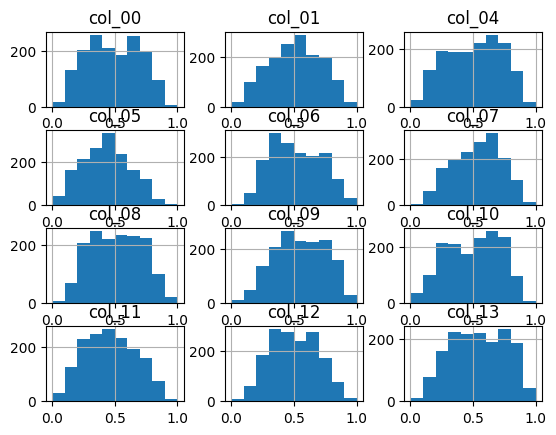

In [5]:
scaled_data.hist()

<AxesSubplot: >

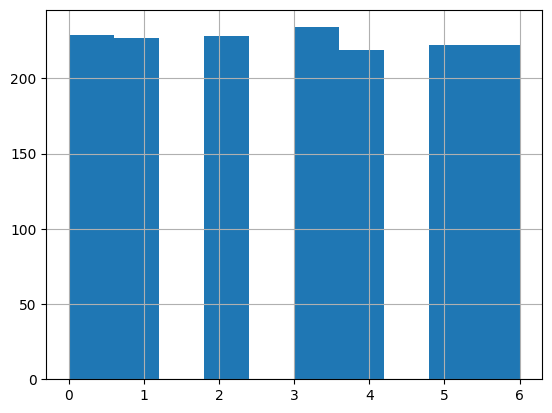

In [6]:
unique_data["label"].hist()

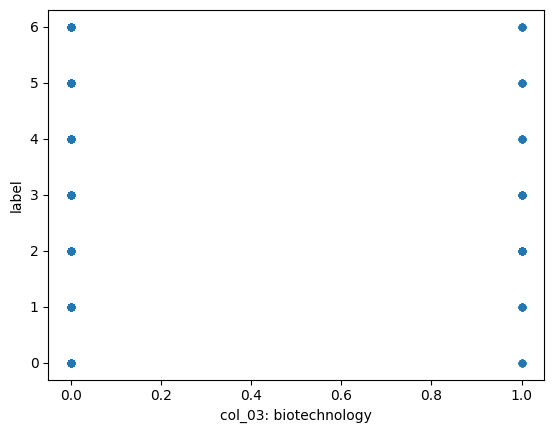

In [24]:
cols = list(unique_data.columns)
cols.remove("label")
corr = unique_data.corr()
corr["label"]
#  total = corr.stack().nsmallest(64)
#  total
#  positive correlation for columns: 9 and 10, 5 and 6,
#  8 and 9, 0 and 4, and 13 and 4
#  negative correlation for columns: 5 and 7, 6 and 7,
#  label and 10, 5 and 11, and label and 9, and 6 and 11
complete_data.plot.scatter(x = "col_03: biotechnology", y = "label")
for column in unique_data:
    if "col_02" in column or "col_03" in column or "col_14" in column:
        unique_data.drop(column, axis = 1, inplace = True)

# Part 3: Modeling

Now that you have a good grasp of your clean data,
it is time to do some machine learning!
(Technically all our previous steps were also machine learning,
but now we get to use classifiers!)

Use the skills you developed to select **three** classifiers and implement them on your data.
For example, you can narrow down your choices to three classifiers which may include:
- Logistic regression
- K-nearest neighbors
- Decision tree
- Or others

<h4 style="color: darkorange";>★ Task 3.A</h4>

Complete the following function that takes in no parameters,
and returns a list with **three** untrained classifiers you are going to explore in this assignment.
This method may set parameters/options for the classifiers, but should not do any training/fitting.

For example, if you wanted to use logistic regression,
then **one** of your list items may be:
```
sklearn.linear_model.LogisticRegression()
```

In [29]:
def create_classifiers():
    class1 = sklearn.tree.DecisionTreeClassifier(criterion = "log_loss",
                                                 max_depth = 4, random_state = 1)
    #  max_depth initially 3, set to 4 after testing
    class2 = sklearn.linear_model.LogisticRegression()
    class3 = sklearn.linear_model.SGDClassifier(loss = 'hinge',
                                            penalty = "elasticnet", l1_ratio = 0.5, alpha = 0.01,
                                            max_iter = 633, random_state = 1)
    arr = [class1, class2, class3]
    return arr
my_classifiers = create_classifiers()
my_classifiers

[DecisionTreeClassifier(criterion='log_loss', max_depth=4, random_state=1),
 LogisticRegression(),
 SGDClassifier(alpha=0.01, l1_ratio=0.5, max_iter=633, penalty='elasticnet',
               random_state=1)]

Now that we have some classifiers, we can see how they perform.

<h4 style="color: darkorange";>★ Task 3.B</h4>

Complete the following function that takes in an untrained classifier, a DataFrame, and a number of folds.
This function should run k-fold cross validation with the classifier and the data,
and return a list with the accuracy of each run of cross validation.
You can assume that the frame has the column `labels` and the rest of the columns can be considered clean numeric features.

Note that you may have to break your frame into features and labels to do this.
Do not change the passed-in frame (make copies instead).

If you are getting any `ConvergenceWarning`s you may either ignore them,
or try and address them
(they will not affect your autograder score, but may be something to discuss in the written portion of this assignment).

In [30]:
def cross_fold_validation(classifier, frame, folds):
    y = frame["label"]
    copy = frame.copy()
    copy.drop("label", axis = 1, inplace = True)
    #  can vary which columns to use
    X = copy
    return list(cross_validate(classifier, X, y)["test_score"])
my_classifiers_scores = []
for classifier in my_classifiers:
    accuracy_scores = cross_fold_validation(classifier, unique_data, 5)
    my_classifiers_scores.append(accuracy_scores)
    print("Classifier: %s, Accuracy: %s." % (type(classifier).__name__, accuracy_scores))

Classifier: DecisionTreeClassifier, Accuracy: [0.9747634069400631, 0.9651898734177216, 0.9715189873417721, 0.9493670886075949, 0.9683544303797469].


C:\Users\tqpat\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tqpat\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Classifier: LogisticRegression, Accuracy: [1.0, 0.9968354430379747, 1.0, 1.0, 0.9936708860759493].
Classifier: SGDClassifier, Accuracy: [0.9968454258675079, 0.9936708860759493, 0.9968354430379747, 1.0, 0.9936708860759493].


<h4 style="color: darkorange";>★ Task 3.C</h4>

Complete the following function that takes in two equally-sized lists of numbers and a p-value.
This function should compute whether there is a statistical significance between
these two lists of numbers using a [Student's t-test](https://en.wikipedia.org/wiki/Student%27s_t-test)
at the given p-value.
Return `True` if there is a statistical significance, and `False` otherwise.
Hint: If you wish, you may use the `ttest_ind()` [method](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) provided in the scipy package. 

In [27]:
def significance_test(a_values, b_values, p_value):
    val = list(ttest_ind(a_values, b_values))
    if val[1] <= p_value:
        return True
    else:
        return False

for i in range(len(my_classifiers)):
    for j in range(i + 1, len(my_classifiers)):
        significant = significance_test(my_classifiers_scores[i], my_classifiers_scores[j], 0.10)
        print("%s vs %s: %s" % (type(my_classifiers[i]).__name__,
                                type(my_classifiers[j]).__name__, significant))

DecisionTreeClassifier vs LogisticRegression: True
DecisionTreeClassifier vs SGDClassifier: True
LogisticRegression vs SGDClassifier: False


In [40]:
arr = ["Decision Tree Classifier", "Logistic Regression", "Stochastic Gradient Descent"]
means = []
for item in range(len(my_classifiers_scores)):
    total = 0
    for jtem in my_classifiers_scores[item]:
        total += jtem
    means.append(total / len(my_classifiers_scores[item]))
stds = []
for item in range(len(my_classifiers_scores)):
    stds.append(numpy.std(my_classifiers_scores[item]))
framey = pandas.DataFrame()
framey["Model"] = arr
framey["Mean Accuracy"] = means
framey["Standard Deviation of Accuracy"] = stds
framey

,Model,Mean Accuracy,Standard Deviation of Accuracy
0,Decision Tree Classifier,0.965839,0.008832
1,Logistic Regression,0.998101,0.002532
2,Stochastic Gradient Descent,0.996205,0.002369


<h4 style="color: darkorange";>★ Written Task: Modeling</h4>

Describe the classifiers you have chosen.
Be sure to include all details about any parameter settings used for the algorithms.

Compare the performance of your models using k-fold validation.
You may look at accuracy, F1 or other measures.

Then, briefly summarize your results.
Are your results statistically significant?
Is there a clear winner?
What do the standard deviations look like, and what do they tell us about the different models?
Include a table like Table 1.

<center>Table 1: Every table need a caption.</center>

| Model | Mean Accuracy | Standard Deviation of Accuracy |
|-------|---------------|--------------------------------|
| Logistic Regression | 0.724 | 0.004
| K-Nearest Neighbor | 0.750 | 0.003
| Decision Tree | 0.655 | 0.011

# Part 4: Analysis

Now, take some time to go over your results for each classifier and try to make sense of them.
 - Why do some classifiers work better than others?
 - Would another evaluation metric work better than vanilla accuracy?
 - Is there still a problem in the data that should fixed in data cleaning?
 - Does the statistical significance between the different classifiers make sense?
 - Are there parameters for the classifier that I can tweak to get better performance?

<h4 style="color: darkorange";>★ Written Task: Analysis</h4>

Discuss your observations, the relationship you found, and how you applied concepts from the class to this project.
For example, you may find that some feature has the most impact in predicting your response variable or removing a feature improves the model accuracy.
Or you may observe that your training accuracy is much higher than your test accuracy and you may want to explain what issues may arise.

# Part 5: Conclusion

<h4 style="color: darkorange";>★ Written Task: Conclusion</h4>

Briefly summarize the important results and conclusions presented in the project.
What are the important points illustrated by your work?
Are there any areas for further investigation or improvement?

<h4 style="color: darkorange";>★ Written Task: References</h4>

Include a standard bibliography with citations referring to techniques or published papers you used throughout your report (if you used any).

For example:
```
[1] Derpanopoulos, G. (n.d.). Bayesian Model Checking & Comparison.
https://georgederpa.github.io/teaching/modelChecking.html.
```